In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\Milind\Desktop\Analytics\auto-mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
data["horsepower"] = data["horsepower"].replace("?",np.nan)
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
data["horsepower"] = data["horsepower"].astype(float)
data["horsepower"].fillna(data["horsepower"].mean(),inplace=True)

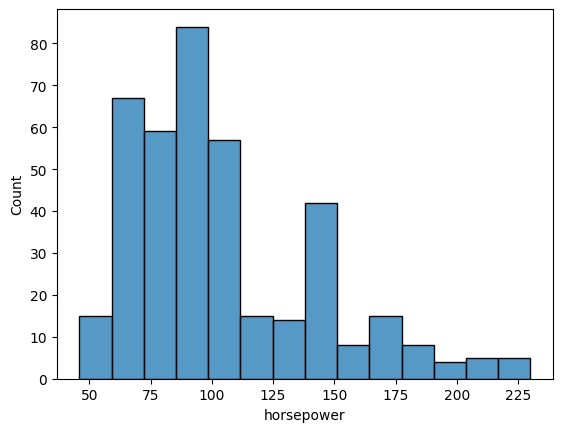

In [8]:
sns.histplot(data, x= 'horsepower')
plt.show()

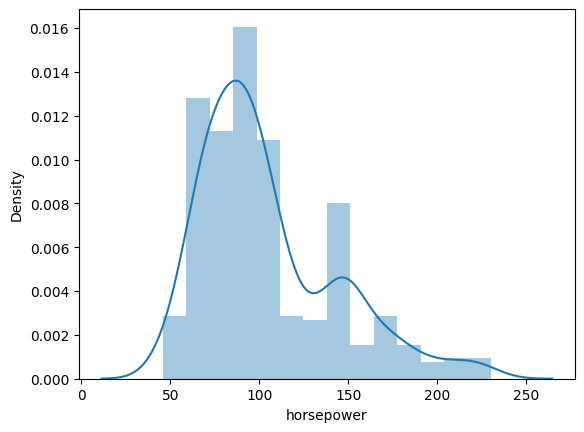

In [9]:
sns.distplot(data.horsepower)
plt.show()

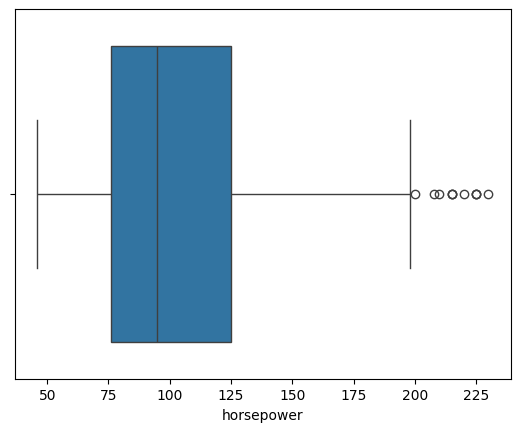

In [10]:
sns.boxplot(data, x= 'horsepower')
plt.show()

In [11]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


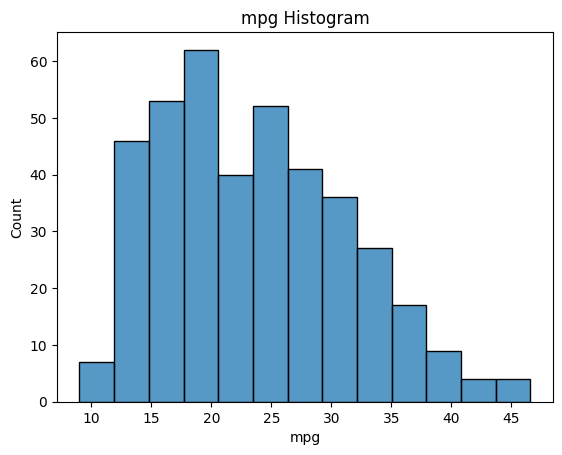

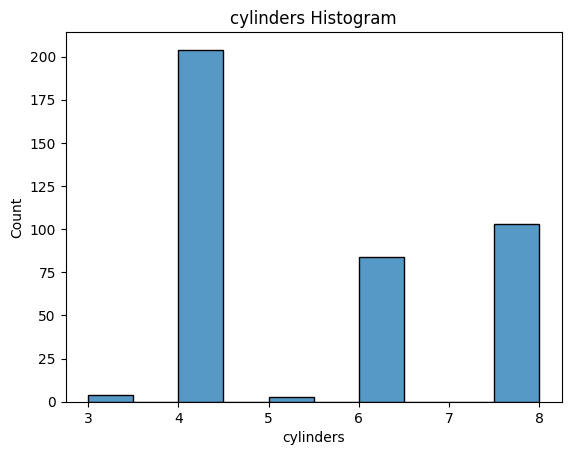

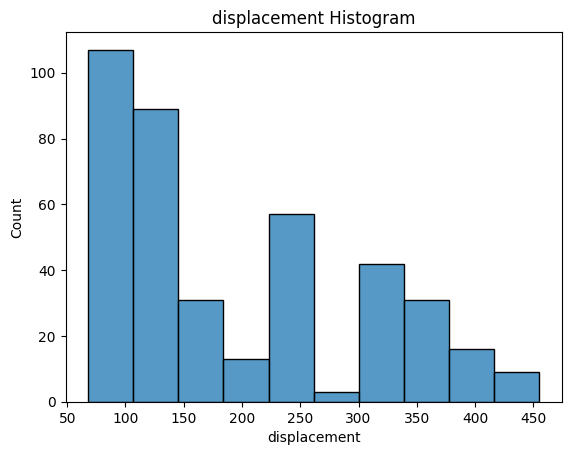

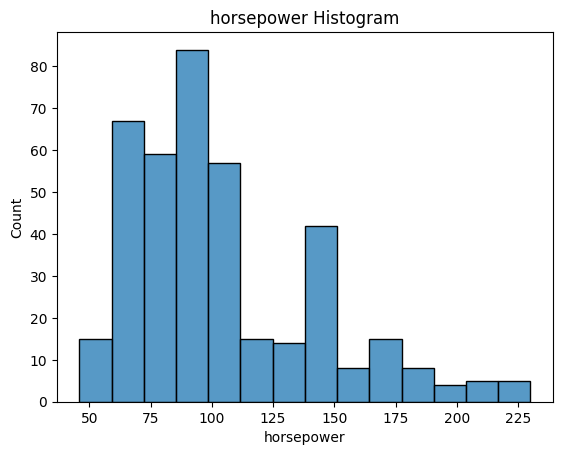

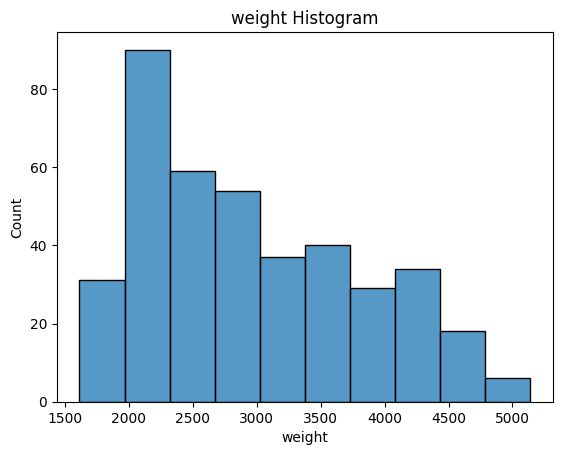

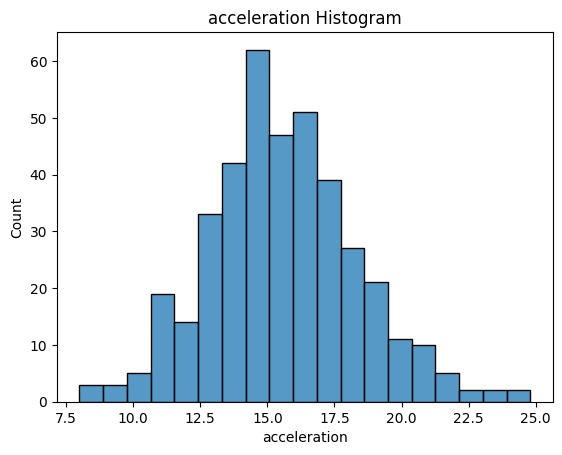

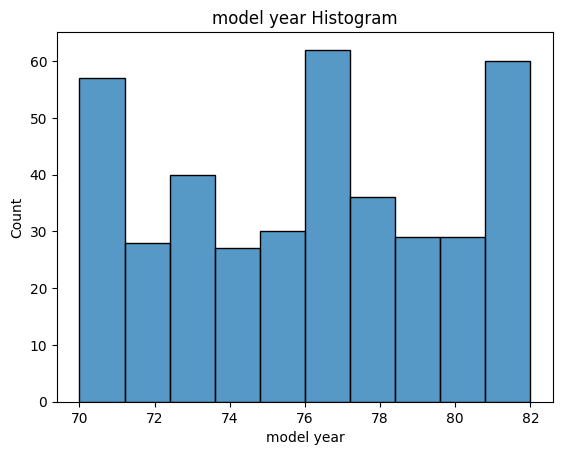

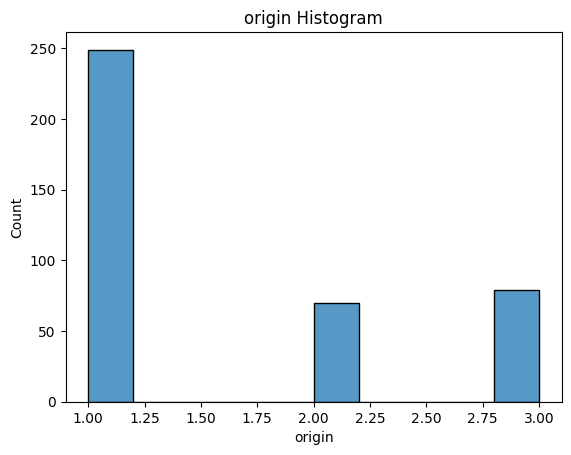

In [12]:
for i in data.iloc[:,:-1]:
    sns.histplot(data[i])
    plt.title(f"{i} Histogram")
    plt.show()

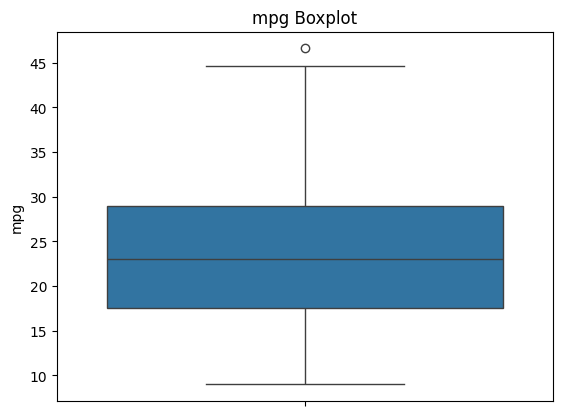

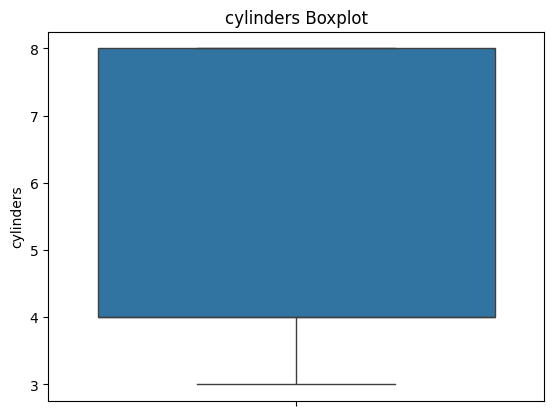

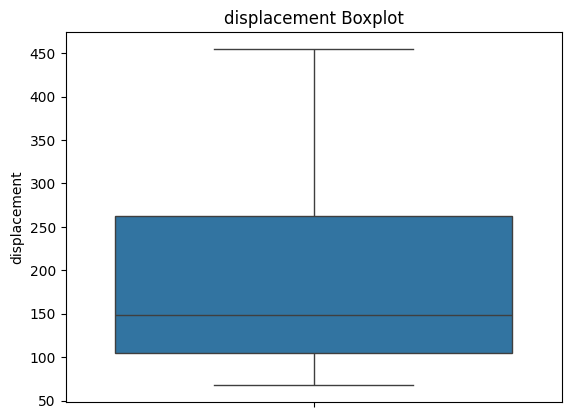

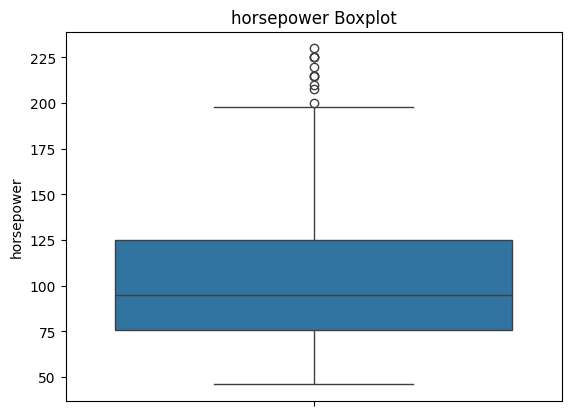

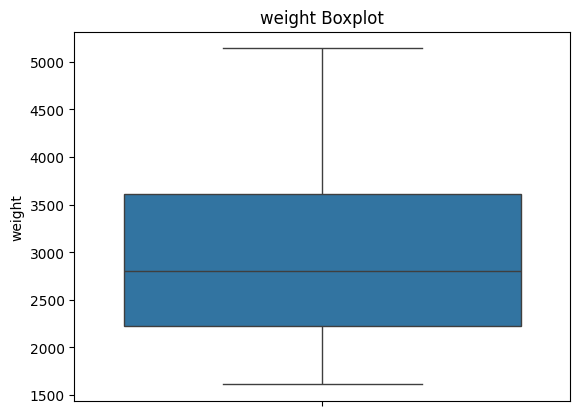

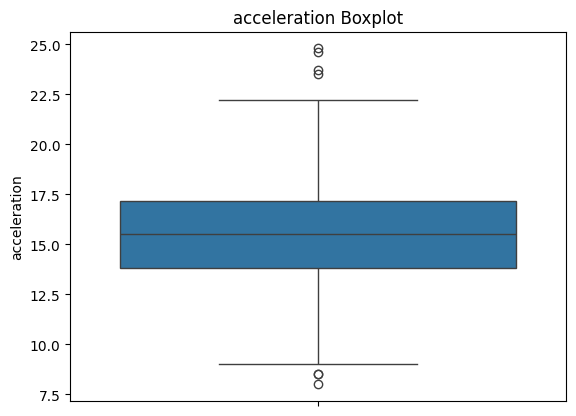

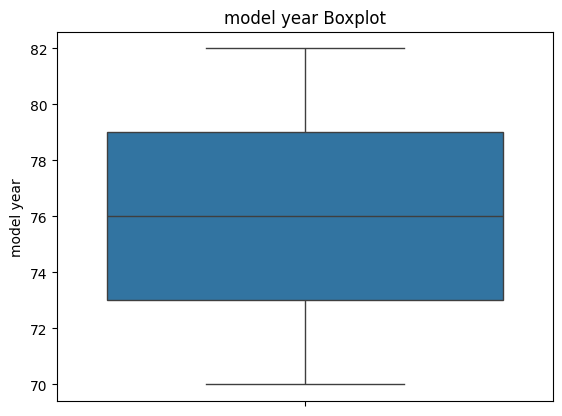

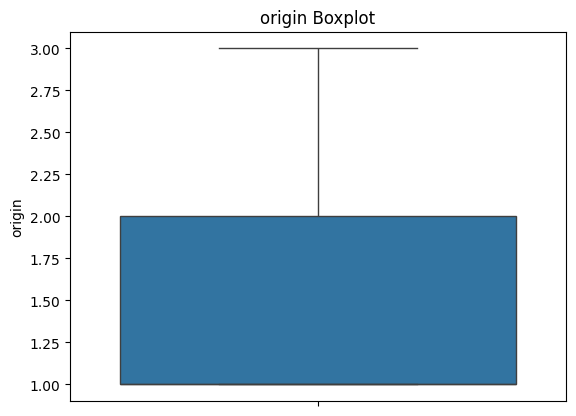

In [13]:
for i in data.iloc[:,:-1]:
    sns.boxplot(data[i])
    plt.title(f"{i} Boxplot")
    plt.show()

In [14]:
data["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

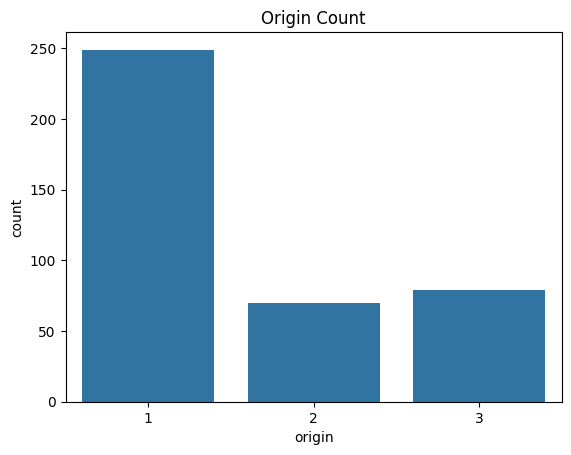

In [15]:
sns.countplot(data,x="origin")
plt.title("Origin Count")
plt.show()

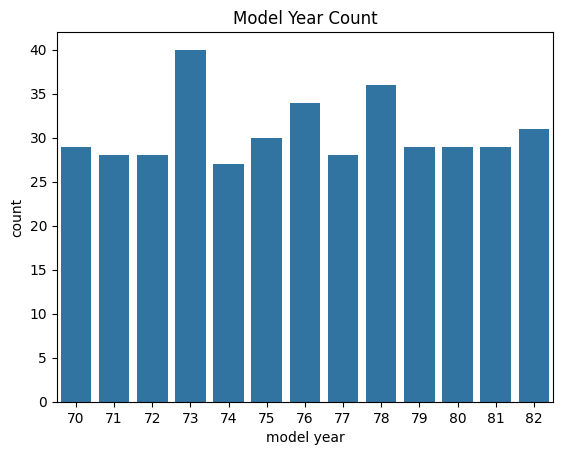

In [16]:
sns.countplot(data,x="model year")
plt.title("Model Year Count")
plt.show()

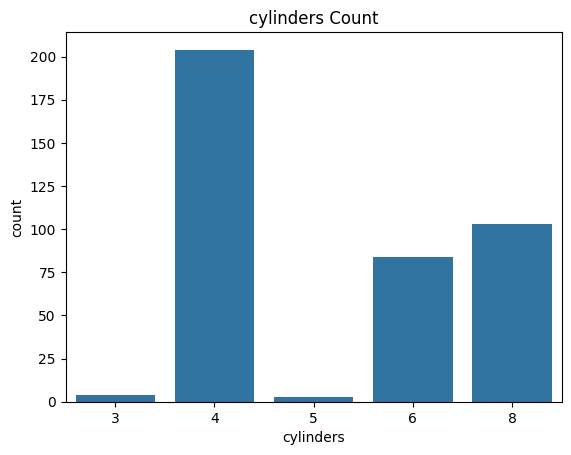

In [17]:
sns.countplot(data,x="cylinders")
plt.title("cylinders Count")
plt.show()

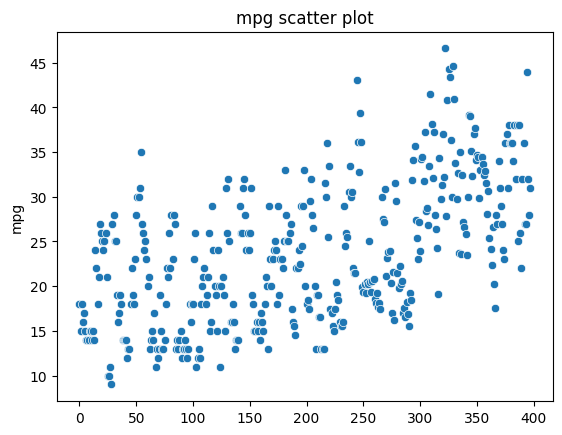

In [18]:
sns.scatterplot(data["mpg"])
plt.title("mpg scatter plot")
plt.show()

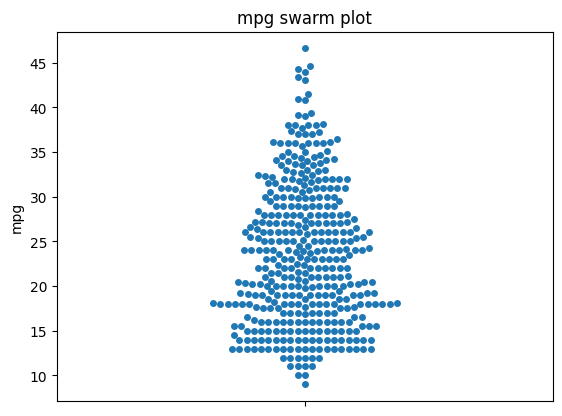

In [19]:
sns.swarmplot(data["mpg"])
plt.title("mpg swarm plot")
plt.show()

In [20]:
X = data.drop(columns=['mpg','car name'])  # Drop the target column
y = data['mpg']
y


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [21]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 7), (80, 7), (318,), (80,))

In [22]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Define the neural network model
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs= 20, batch_size=2, validation_split=0.1)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 203.8103 - mae: 10.7281 - mse: 203.8103 - val_loss: 18.2471 - val_mae: 3.3428 - val_mse: 18.2471
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.9025 - mae: 3.1214 - mse: 16.9025 - val_loss: 18.6424 - val_mae: 3.1842 - val_mse: 18.6424
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.1999 - mae: 2.4751 - mse: 11.1999 - val_loss: 23.1654 - val_mae: 3.6667 - val_mse: 23.1654
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 12.0578 - mae: 2.5908 - mse: 12.0578 - val_loss: 14.5225 - val_mae: 2.8753 - val_mse: 14.5225
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11.7535 - mae: 2.5939 - mse: 11.7535 - val_loss: 16.2640 - val_mae: 3.0155 - val_mse: 16.2640
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5600 - mae: 2.2921 - mse: 9.5600 - val_loss: 14.0577 - val_mae: 2.6694 - val_mse: 14.0577
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.5074 - mae:

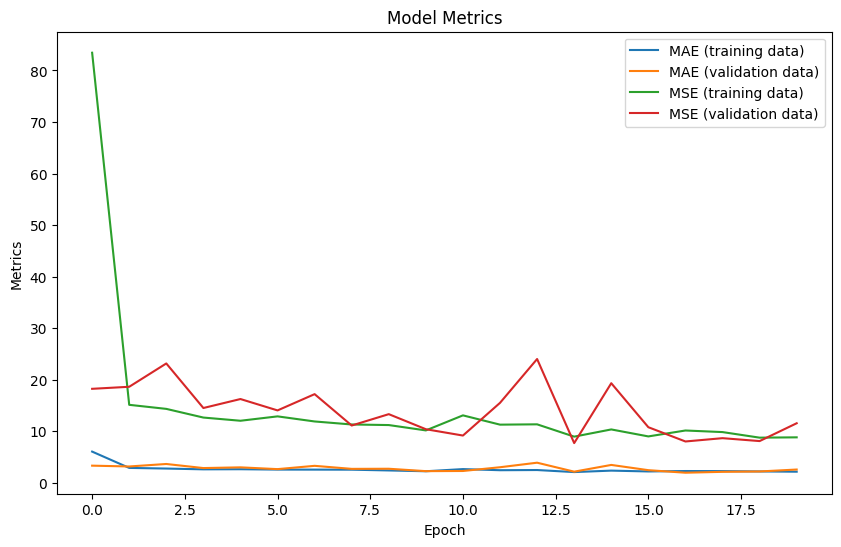

In [24]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.plot(history.history['mse'], label='MSE (training data)')
plt.plot(history.history['val_mse'], label='MSE (validation data)')
plt.title('Model Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [25]:
# Evaluate the model on test data
loss, mae, mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Mean Absolute Error: 1.7094905376434326
Mean Squared Error: 5.02541446685791


In [26]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
R2 Score: 0.9065325055541804
